# RIASEC Career Compass (Realistic,Investigative,Artistic,Social,Enterprising,Conventional)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import panel as pn

from pathlib import Path
import plotly.express as px
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox

import geopandas as gpd
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_10205/3055456682.py:20: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_10205/3055456682.py:21: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
cwd = Path.cwd()

In [3]:
df = pd.read_excel((cwd/'project_data'/'2023-33'/'skills.xlsx').resolve(),sheet_name= "Table 6.1",skiprows=1, header=0)
df = df.drop(df.tail(4).index)
df['2023 National Employment Matrix code'] = df['2023 National Employment Matrix code'].str.split('-').str[0]
df.head()
df_selected = df[['2023 National Employment Matrix title', '2023 National Employment Matrix code']]
df_selected = df_selected.drop(index=0).reset_index(drop=True)
# df_selected["2023 National Employment Matrix code"] = range(0, len(df_selected))
df_selected

,2023 National Employment Matrix title,2023 National Employment Matrix code
0,Management occupations,11
1,Business and financial operations occupations,13
2,Computer and mathematical occupations,15
3,Architecture and engineering occupations,17
4,"Life, physical, and social science occupations",19
5,Community and social service occupations,21
6,Legal occupations,23
7,Educational instruction and library occupations,25
8,"Arts, design, entertainment, sports, and med...",27
9,Healthcare practitioners and technical occup...,29


In [4]:
df1 = pd.read_excel((cwd/'project_data'/'2023-33'/'skills.xlsx').resolve(),sheet_name= "Table 6.2",skiprows=1, header=0)
df1.head()
df1 = df1.iloc[:-6]
df1 = df1.drop(index=0).reset_index(drop=True)
df1['2023 National Employment Matrix code'] = df1['2023 National Employment Matrix code'].str.split('-').str[0]
df1

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]",Typical education needed for entry,Adaptability,Computers and information technology,...,Interpersonal,Leadership,Mathematics,Mechanical,Physical strength and stamina,Problem solving and decision making,Project management,Science,Speaking and listening,Writing and reading
0,Chief executives,11,313.9,331.1,17.2,5.5,206680,Bachelor's degree,4.2,3.7,...,4.0,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4.0,4.2
1,General and operations managers,11,3630.1,3840.5,210.4,5.8,101280,Bachelor's degree,4.1,3.5,...,3.7,4.0,3.0,1.7,1.7,4.1,3.6,1.7,3.5,3.8
2,Legislators[2],11,33.7,35.0,1.4,4.1,47290,Bachelor's degree,4.2,3.7,...,4.0,4.5,3.3,1.5,1.3,4.6,4.1,1.8,4.0,4.2
3,Advertising and promotions managers,11,22.2,21.7,-0.6,-2.6,131870,Bachelor's degree,4.0,3.6,...,3.5,3.2,3.0,1.3,1.3,3.8,3.1,1.4,3.9,3.7
4,Marketing managers,11,389.1,420.8,31.7,8.2,157620,Bachelor's degree,4.0,3.6,...,3.5,3.8,3.1,1.1,1.3,4.0,3.3,1.3,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53,11.7,12.3,0.6,5.0,54690,High school diploma or equivalent,3.2,2.8,...,2.6,2.8,2.8,3.1,2.9,3.5,3.0,2.0,2.8,3.2
828,Wellhead pumpers,53,19.4,19.0,-0.4,-2.0,71830,High school diploma or equivalent,3.5,3.1,...,2.9,3.1,2.4,3.2,2.8,3.6,2.7,2.0,2.6,2.8
829,Refuse and recyclable material collectors,53,148.4,151.9,3.5,2.3,45760,No formal educational credential,2.7,1.6,...,2.5,2.1,1.3,2.6,3.0,2.7,1.5,1.2,2.5,2.3
830,"Tank car, truck, and ship loaders",53,12.7,13.2,0.5,3.9,58620,No formal educational credential,3.6,3.0,...,3.0,3.2,2.5,2.9,3.3,3.5,2.8,1.8,2.8,3.1


### Wage Data

In [5]:
folder_oesm23nat = 'project_data/oesm23nat'
national_M2023_dl_filename = "national_M2023_dl.xlsx"
national_M2023_dl_path = (cwd/folder_oesm23nat/national_M2023_dl_filename).resolve()
national_M2023_dl = pd.ExcelFile(national_M2023_dl_path)

In [6]:
national_M2023_dl_sheet_names = national_M2023_dl.sheet_names
national_M2023_dl_sheet_dfs = {}

for sheet_name in national_M2023_dl_sheet_names:
    national_M2023_dl_sheet_dfs[sheet_name] = pd.read_excel(national_M2023_dl_path, sheet_name=sheet_name)

In [7]:
national_M2023_dl_sheet_dfs['national_M2023_dl'].drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL','PCT_RPT'], axis=1, inplace=True)
national_M2023_dl_sheet_dfs['national_M2023_dl']

columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(str)

national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = \
    national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].map(
        lambda x: x.replace('*', '0').replace('#', '0')
    )
national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace] = national_M2023_dl_sheet_dfs['national_M2023_dl'][columns_to_replace].astype(np.float64)

In [8]:
wage_df = national_M2023_dl_sheet_dfs['national_M2023_dl'].loc[:,['OCC_CODE','OCC_TITLE','TOT_EMP','EMP_PRSE','A_MEAN','MEAN_PRSE']]
wage_df['OCC_CODE'] = wage_df['OCC_CODE'].astype('str')
wage_df.drop_duplicates(['OCC_TITLE'],inplace=True)
wage_df

,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,A_MEAN,MEAN_PRSE
0,00-0000,All Occupations,151853870,0.0,65470.0,0.3
1,11-0000,Management Occupations,10495770,0.4,137750.0,0.5
2,11-1000,Top Executives,3751510,0.4,136100.0,0.9
3,11-1010,Chief Executives,211230,1.4,258900.0,0.7
5,11-1020,General and Operations Managers,3507810,0.4,129330.0,0.9
...,...,...,...,...,...,...
1396,53-7073,Wellhead Pumpers,18230,6.2,69930.0,1.6
1397,53-7080,Refuse and Recyclable Material Collectors,135430,1.3,47810.0,0.7
1399,53-7120,"Tank Car, Truck, and Ship Loaders",11400,4.7,60530.0,1.5
1401,53-7190,Miscellaneous Material Moving Workers,23970,3.4,45840.0,1.0


In [9]:
cwd = Path.cwd()
path = cwd / "project_data" /"Employee_NonfarmPayrolls.xlsx"
payroll_data_path = path.resolve()
payroll_data_path

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-data-final/LabourData/notebooks/project_data/Employee_NonfarmPayrolls.xlsx')

In [10]:
payroll_df = pd.read_excel(payroll_data_path, sheet_name=5)
payroll_df.head()

,State,Total,Mining and logging,Construction,Manufacturing,"Trade, transportation, and utilities",Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government
0,Alabama,2220.7,8.9,108.1,287.9,415.2,24.5,104.0,268.2,274.5,210.7,105.0,413.7
1,Alaska,335.7,12.5,22.3,10.9,66.2,4.2,11.1,29.2,54.2,33.4,12.2,79.5
2,Arizona,3298.6,15.6,219.2,191.7,630.5,49.1,246.1,478.4,564.3,354.3,104.1,445.3
3,Arkansas,1385.2,5.4,67.8,163.3,270.0,12.6,71.0,160.7,222.8,128.2,66.1,217.3
4,California,18202.1,19.9,939.3,1299.0,3146.5,520.2,819.1,2798.3,3312.2,2045.3,604.8,2697.5


In [11]:
payroll_numerical_cols = ['Total', 'Mining and logging', 'Construction', 'Manufacturing',
       'Trade, transportation, and utilities', 'Information',
       'Financial activities', 'Professional and business services',
       'Education and health services', 'Leisure and hospitality',
       'Other services', 'Government']

payroll_df[payroll_numerical_cols] = payroll_df[payroll_numerical_cols].astype(str)
payroll_df[payroll_numerical_cols] = payroll_df[payroll_numerical_cols].map(
    lambda x: x.replace(",","")
)
payroll_df[payroll_numerical_cols] = payroll_df[payroll_numerical_cols].astype(float)

In [12]:
payroll_df[payroll_numerical_cols] = payroll_df[payroll_numerical_cols] * 1000
payroll_df[payroll_numerical_cols].head()

,Total,Mining and logging,Construction,Manufacturing,"Trade, transportation, and utilities",Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government
0,2220700.0,8900.0,108100.0,287900.0,415200.0,24500.0,104000.0,268200.0,274500.0,210700.0,105000.0,413700.0
1,335700.0,12500.0,22300.0,10900.0,66200.0,4200.0,11100.0,29200.0,54200.0,33400.0,12200.0,79500.0
2,3298600.0,15600.0,219200.0,191700.0,630500.0,49100.0,246100.0,478400.0,564300.0,354300.0,104100.0,445300.0
3,1385200.0,5400.0,67800.0,163300.0,270000.0,12600.0,71000.0,160700.0,222800.0,128200.0,66100.0,217300.0
4,18202100.0,19900.0,939300.0,1299000.0,3146500.0,520200.0,819100.0,2798300.0,3312200.0,2045300.0,604800.0,2697500.0


In [13]:
payroll_df_industries = ['Mining and logging', 'Construction', 'Manufacturing',
       'Trade, transportation, and utilities', 'Information',
       'Financial activities', 'Professional and business services',
       'Education and health services', 'Leisure and hospitality',
       'Other services', 'Government']

In [14]:
nat_wage_2019 = pd.read_excel('project_data/oesm19nat/national_M2019_dl.xlsx')
columns_to_extract = ['occ_code', 'occ_title', 'tot_emp','a_mean'] 
nat_wage_2019 = nat_wage_2019[columns_to_extract]
nat_wage_2023 = pd.read_excel('project_data/oesm23nat/national_M2023_dl.xlsx')
nat_wage_2023.columns = nat_wage_2023.columns.str.lower()
columns_to_extract = ['occ_code', 'occ_title', 'tot_emp','a_mean'] 
nat_wage_2023 = nat_wage_2023[columns_to_extract]
merged_df = pd.merge(nat_wage_2019[columns_to_extract], nat_wage_2023[columns_to_extract], on=['occ_code', 'occ_title'], how='outer', suffixes=('_nat_wage_2019', '_nat_wage_2023'))
merged_df.rename(columns={'tot_emp_nat_wage_2019': 'tot_emp_2019', 'tot_emp_nat_wage_2023': 'tot_emp_2023','a_mean_nat_wage_2019':'annual_2019','a_mean_nat_wage_2023':'annual_2023'}, inplace=True)
new_column_order = ["occ_code", "occ_title", "tot_emp_2019", "tot_emp_2023", "annual_2019", "annual_2023"]
merged_df = merged_df[new_column_order]
merged_df

,occ_code,occ_title,tot_emp_2019,tot_emp_2023,annual_2019,annual_2023
0,00-0000,All Occupations,146875480.0,151853870.0,53490,65470
1,11-0000,Management Occupations,8054120.0,10495770.0,122480,137750
2,11-1000,Top Executives,2658440.0,3751510.0,127070,136100
3,11-1010,Chief Executives,205890.0,211230.0,193850,258900
4,11-1011,Chief Executives,205890.0,211230.0,193850,258900
...,...,...,...,...,...,...
1442,53-7081,Refuse and Recyclable Material Collectors,121330.0,135430.0,41400,47810
1443,53-7120,"Tank Car, Truck, and Ship Loaders",11620.0,11400.0,47580,60530
1444,53-7121,"Tank Car, Truck, and Ship Loaders",11620.0,11400.0,47580,60530
1445,53-7190,Miscellaneous Material Moving Workers,28240.0,23970.0,36530,45840


In [15]:
common_df = pd.merge(nat_wage_2019[columns_to_extract], nat_wage_2023[columns_to_extract], on=['occ_code', 'occ_title'], how='inner', suffixes=('_nat_wage_2019', '_nat_wage_2023'))
common_df.rename(columns={'tot_emp_nat_wage_2019': 'tot_emp_2019', 'tot_emp_nat_wage_2023': 'tot_emp_2023'}, inplace=True)
common_df.rename(columns={'tot_emp_nat_wage_2019': 'tot_emp_2019', 'tot_emp_nat_wage_2023': 'tot_emp_2023','a_mean_nat_wage_2019':'annual_2019','a_mean_nat_wage_2023':'annual_2023'}, inplace=True)
new_column_order = ["occ_code", "occ_title", "tot_emp_2019", "tot_emp_2023", "annual_2019", "annual_2023"]
common_df = merged_df[new_column_order]
common_df['change'] = ((common_df['tot_emp_2023'] - common_df['tot_emp_2019']))
common_df['percent_change'] = ((common_df['tot_emp_2023'] - common_df['tot_emp_2019']) / common_df['tot_emp_2019']) * 10
department_df = pd.read_excel('project_data/2023-33/skills.xlsx', sheet_name=1, skiprows=1)
department_df = department_df[:23]
departments = {row['2023 National Employment Matrix title']: row['2023 National Employment Matrix code'].split('-')[0] for _, row in department_df.iterrows()}
del departments['Total, all occupations']
departments = {key.strip(): value for key, value in departments.items()}
common_df['department_number'] = common_df['occ_code'].str.split('-').str[0].astype(str)
common_df['department_name'] = common_df['department_number'].map({v: k for k, v in departments.items()})
common_df = common_df[1:]
common_df = common_df[~common_df['occ_code'].str.contains('-0000')]
common_df

,occ_code,occ_title,tot_emp_2019,tot_emp_2023,annual_2019,annual_2023,change,percent_change,department_number,department_name
2,11-1000,Top Executives,2658440.0,3751510.0,127070,136100,1093070.0,4.111697,11,Management occupations
3,11-1010,Chief Executives,205890.0,211230.0,193850,258900,5340.0,0.259362,11,Management occupations
4,11-1011,Chief Executives,205890.0,211230.0,193850,258900,5340.0,0.259362,11,Management occupations
5,11-1020,General and Operations Managers,2400280.0,3507810.0,123030,129330,1107530.0,4.614170,11,Management occupations
6,11-1021,General and Operations Managers,2400280.0,3507810.0,123030,129330,1107530.0,4.614170,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...
1442,53-7081,Refuse and Recyclable Material Collectors,121330.0,135430.0,41400,47810,14100.0,1.162120,53,Transportation and material moving occupations
1443,53-7120,"Tank Car, Truck, and Ship Loaders",11620.0,11400.0,47580,60530,-220.0,-0.189329,53,Transportation and material moving occupations
1444,53-7121,"Tank Car, Truck, and Ship Loaders",11620.0,11400.0,47580,60530,-220.0,-0.189329,53,Transportation and material moving occupations
1445,53-7190,Miscellaneous Material Moving Workers,28240.0,23970.0,36530,45840,-4270.0,-1.512040,53,Transportation and material moving occupations


In [16]:
occupation_df_2029 = pd.read_excel('project_data/2019-29/occupation.xlsx', sheet_name= "Table 1.2",skiprows=1, header=0)
occupation_df_2023 = pd.read_excel('project_data/2023-33/occupation.xlsx',sheet_name= "Table 1.2",skiprows=1, header=0)
columns_to_extract_2029 = ['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Employment, 2029','Occupational openings, 2019-29 annual average']
columns_to_extract_2023 = ['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Employment, 2023','Occupational openings, 2023–33 annual average']
occupation_df_2029 = occupation_df_2029[columns_to_extract_2029]
occupation_df_2023 = occupation_df_2023[columns_to_extract_2023]
len(occupation_df_2023), len(occupation_df_2029)

(1117, 1049)

In [17]:
occupation_df_2023.drop(occupation_df_2023.tail(4).index,inplace=True)
occupation_df_2023

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Occupational openings, 2023–33 annual average"
0,"Total, all occupations",00-0000,167849.8,19174.8
1,Management occupations,11-0000,13181.3,1160.0
2,Top executives,11-1000,3977.7,346.5
3,Chief executives,11-1011,313.9,23.0
4,General and operations managers,11-1021,3630.1,320.8
...,...,...,...,...
1108,"Pump operators, except wellhead pumpers",53-7072,11.7,1.3
1109,Wellhead pumpers,53-7073,19.4,2.0
1110,Refuse and recyclable material collectors,53-7081,148.4,18.0
1111,"Tank car, truck, and ship loaders",53-7121,12.7,1.4


In [18]:
# Rename columns to avoid clashes
occupation_df_2029_renamed = occupation_df_2029.rename(columns={
    '2019 National Employment Matrix title': 'occ_title',
    '2019 National Employment Matrix code': 'occ_code',
})

occupation_df_2023_renamed = occupation_df_2023.rename(columns={
    '2023 National Employment Matrix title': 'occ_title',
    '2023 National Employment Matrix code': 'occ_code',
})

occupation_df_2029_renamed.columns = occupation_df_2029_renamed.columns.str.strip()
occupation_df_2023_renamed.columns = occupation_df_2023_renamed.columns.str.strip()

common_occupation_df = pd.merge(occupation_df_2029_renamed, occupation_df_2023_renamed, 
                                on=['occ_code'], 
                                how='inner')
common_occupation_df.drop('occ_title_y',inplace=True, axis=1)
common_occupation_df.rename(columns={'occ_title_x':'occ_title'}, inplace=True)
common_occupation_df['change'] = ((common_occupation_df['Employment, 2029'] - common_occupation_df['Employment, 2023']))
common_occupation_df['percent_change'] = ((common_occupation_df['Employment, 2029'] - common_occupation_df['Employment, 2023']) / common_occupation_df['Employment, 2023']) * 10
common_occupation_df = common_occupation_df.iloc[1:,:]
common_occupation_df = common_occupation_df[~common_occupation_df['occ_code'].str.contains('-0000')]
common_occupation_df



,occ_title,occ_code,"Employment, 2029","Occupational openings, 2019-29 annual average","Employment, 2023","Occupational openings, 2023–33 annual average",change,percent_change
2,Top executives,11-1000,2946.3,222.2,3977.7,346.5,-1031.4,-2.592956
3,Chief executives,11-1011,259.1,13.9,313.9,23.0,-54.8,-1.745779
4,General and operations managers,11-1021,2630.2,204.4,3630.1,320.8,-999.9,-2.754470
5,Legislators,11-1031,57.0,3.9,33.7,2.7,23.3,6.913947
6,"Advertising, marketing, promotions, public rel...",11-2000,879.0,70.0,1112.6,94.1,-233.6,-2.099587
...,...,...,...,...,...,...,...,...
1019,"Pump operators, except wellhead pumpers",53-7072,11.5,1.2,11.7,1.3,-0.2,-0.170940
1020,Wellhead pumpers,53-7073,14.7,1.5,19.4,2.0,-4.7,-2.422680
1021,Refuse and recyclable material collectors,53-7081,145.4,18.2,148.4,18.0,-3.0,-0.202156
1022,"Tank car, truck, and ship loaders",53-7121,12.0,1.3,12.7,1.4,-0.7,-0.551181


In [19]:
# label_dict = {
#    'Realistic':  'how likely are you to prefer working with tools, machines, or animals rather than engaging in social activities or helping others directly?',
#    'Social':  'how likely are you to enjoy helping people, whether by teaching, providing care, or giving advice, more than working with machines or animals?',
#    'Investigative': 'how likely are you to be drawn to solving science or math problems and prefer understanding things logically over leading or persuading others?',
#    'Enterprising': 'how likely are you to enjoy leading others, selling ideas, and pursuing success in business or leadership roles more than working with details or analytical tasks?', 
#    'Artistic': 'how likely are you to enjoy creative activities like music, art, or writing and value originality and self-expression over structured or repetitive tasks?',
#    'Conventional': 'how likely are you to prefer working in a structured environment with numbers, records, or machines, and value order and organization over ambiguity or flexibility?'
# }

### Holland's Personality Type Mapping
https://www.careerkey.org/fit/personality/holland-code-assessment-riasec


Realistic        0
Investigative    0
Artistic         0
Social           0
Enterprising     0
Conventional     0
dtype: int64


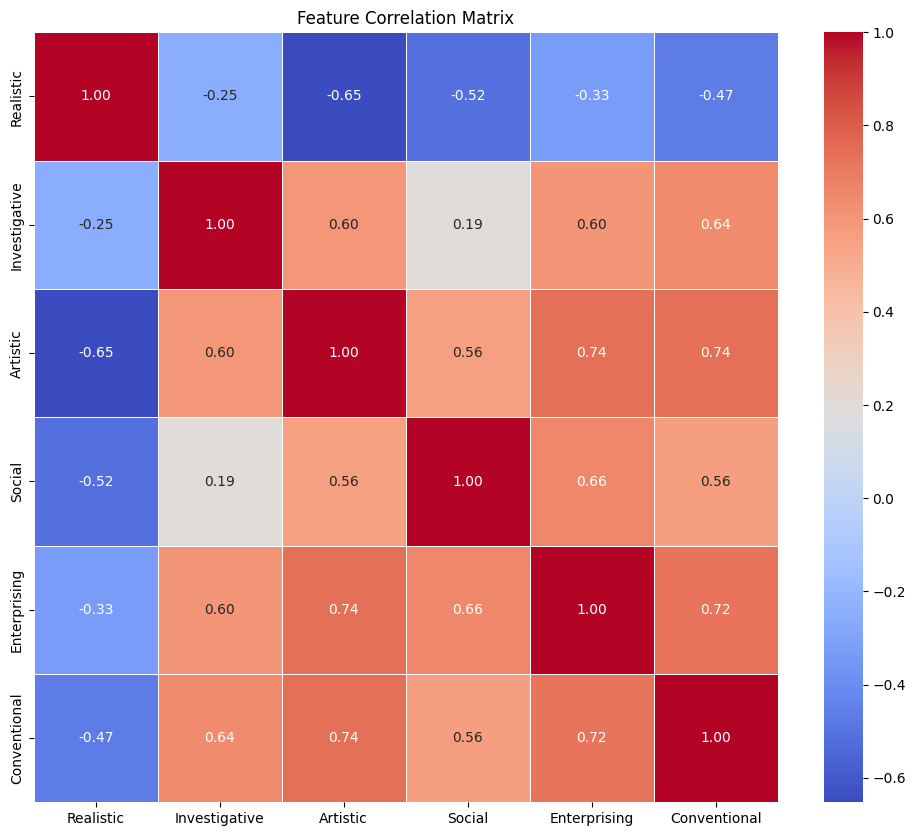


Model Accuracy: 0.60
Training set size: 696
Testing set size: 136

Feature Importances:
         Feature  Importance
0      Realistic    0.196399
3         Social    0.189346
5   Conventional    0.162044
1  Investigative    0.154639
2       Artistic    0.149055
4   Enterprising    0.148517

Model Top-5 Accuracy: 0.90
Sample 1:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.83)), (np.int64(11), np.float64(0.04333333333333334)), (np.int64(7), np.float64(0.03)), (np.int64(9), np.float64(0.03)), (np.int64(1), np.float64(0.02))]
Sample 2:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.6766666666666665)), (np.int64(16), np.float64(0.11)), (np.int64(15), np.float64(0.08)), (np.int64(14), np.float64(0.05)), (np.int64(1), np.float64(0.03333333333333333))]
Sample 3:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(7), np.float64(0.35)), (np.int64(0), np.float64(0.25)), (np.int64(1), np.float64(0.21)),

In [20]:
riasec_mapping = {
    'Realistic': ['Mechanical', 'Physical strength and stamina', 'Fine motor'],
    'Investigative': ['Science', 'Mathematics', 'Critical and analytical thinking'],
    'Artistic': ['Creativity and innovation', 'Writing and reading'],
    'Social': ['Interpersonal', 'Speaking and listening', 'Customer service'],
    'Enterprising': ['Leadership', 'Project management', 'Problem solving and decision making', 'Adaptability'],
    'Conventional': ['Computers and information technology', 'Detail oriented', 'Adaptability'],
}

for theme, columns in riasec_mapping.items():
    df1[theme] = df1[columns].mean(axis=1)

X = df1[['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']]

print(X.isnull().sum())
X = X.fillna(X.mean())
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

y = df1['2023 National Employment Matrix code']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test = pd.DataFrame(), pd.DataFrame()
y_train, y_test = [], []

# Loop through each category to split 80-20
for category in set(y):
    category_indices = (y == category) 
    X_category = X[category_indices]
    y_category = y[category_indices]
    
    # Perform an 80-20 split for this category
    X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(
        X_category, y_category, test_size=0.15, random_state=42)
    
    # Append the split data to the main train/test sets
    X_train = pd.concat([X_train, X_cat_train])
    X_test = pd.concat([X_test, X_cat_test])
    y_train.extend(y_cat_train)
    y_test.extend(y_cat_test)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print(f"Training set size: {len(y_train)}")
print(f"Testing set size: {len(y_test)}")

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

y_pred_proba = model.predict_proba(X_test)

top_5_predictions_with_confidence = []

correct_predictions = 0

for i in range(len(y_pred_proba)):
    top_5_indices = np.argsort(y_pred_proba[i])[-5:][::-1]
    top_5_confidences = y_pred_proba[i][top_5_indices]

    top_5_predictions_with_confidence.append(
        list(zip(top_5_indices, top_5_confidences))
    )

    if y_test.iloc[i] in top_5_indices:
        correct_predictions += 1

top_5_accuracy = correct_predictions / len(y_test)
print(f"\nModel Top-5 Accuracy: {top_5_accuracy:.2f}")

for idx, (preds, true_label) in enumerate(zip(top_5_predictions_with_confidence, y_test)):
    print(f"Sample {idx + 1}:")
    print(f"  True Label: {true_label}")
    print(f"  Top 5 Predictions (Class, Confidence): {preds}")
    if idx == 4:
        break


### RIASEC Mapping (Realistic,Investigative,Artistic,Social,Enterprising,Conventional)

							 RIASEC Mapping 							


Button(description='Submit', style=ButtonStyle())

Waiting for user input...



Top 5 predicted target labels for the new data:
1:   Office and administrative support occupations (Probability: 0.1900)
2:   Building and grounds cleaning and maintenance occupations (Probability: 0.1700)
3:   Business and financial operations occupations (Probability: 0.1400)
4:   Educational instruction and library occupations (Probability: 0.1200)
5:   Food preparation and serving related occupations (Probability: 0.0700)

Most likely job title:   Office and administrative support occupations


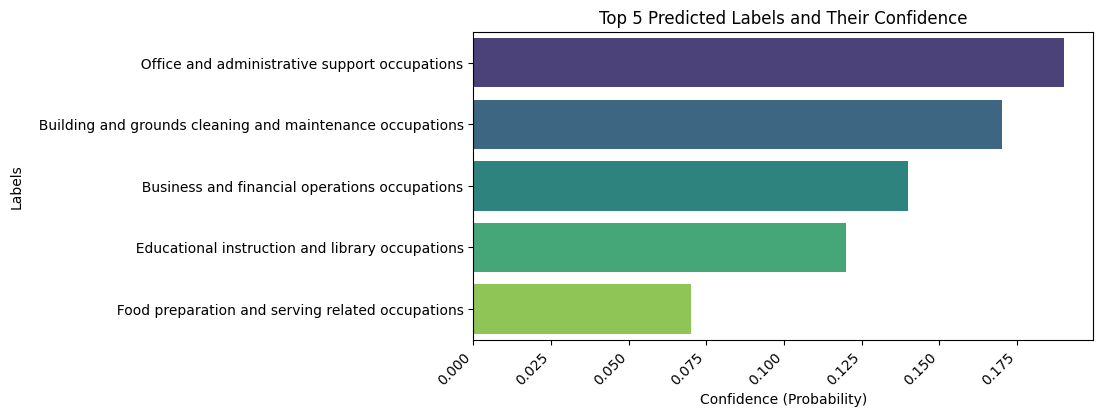

In [21]:
top_5_labels_global = []
top_5_probs_global = []

riasec_mapping = {
    'Realistic': ['Mechanical', 'Physical strength and stamina', 'Fine motor'],
    'Investigative': ['Science', 'Mathematics', 'Critical and analytical thinking'],
    'Artistic': ['Creativity and innovation', 'Writing and reading'],
    'Social': ['Interpersonal', 'Speaking and listening', 'Customer service'],
    'Enterprising': ['Leadership', 'Project management', 'Problem solving and decision making', 'Adaptability'],
    'Conventional': ['Computers and information technology', 'Detail oriented', 'Adaptability'],
}

# Compute RIASEC scores
for theme, columns in riasec_mapping.items():
    df[theme] = df[columns].mean(axis=1)

X = df[['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']]
X = X.fillna(X.mean())

# Target variable
y = df['2023 National Employment Matrix code']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Map back to original title using label_encoder.inverse_transform
titles = df['2023 National Employment Matrix title']
y_titles = label_encoder.fit_transform(titles)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# -----------------------
# Widgets for User Input
# -----------------------
widgets_dict = {
    'Realistic': widgets.FloatText(description='Realistic', value=0),
    'Investigative': widgets.FloatText(description='Investigative', value=0),
    'Artistic': widgets.FloatText(description='Artistic', value=0),
    'Social': widgets.FloatText(description='Social', value=0),
    'Enterprising': widgets.FloatText(description='Enterprising', value=0),
    'Conventional': widgets.FloatText(description='Conventional', value=0)
}

user_inputs = {}
X_new = None

def get_user_input():
    global X_new
    for feature, widget in widgets_dict.items():
        user_inputs[feature] = widget.value
        
    X_new = pd.DataFrame([user_inputs])

submit_button = widgets.Button(description="Submit")

print("\t\t\t\t\t\t\t RIASEC Mapping \t\t\t\t\t\t\t")
# print("\t\t\t\t\t\t\t \033[1mRIASEC Mapping (1 = Not likely at all, 4.5 = Extremely likely) \033[0m\t\t\t\t\t\t\t")

def on_submit(b):
    global top_5_labels_global, top_5_probs_global
    
    get_user_input()

    if X_new is not None:
        y_new_pred_prob = model.predict_proba(X_new)

        top_5_indices = np.argsort(y_new_pred_prob[0])[-5:][::-1]

        top_5_labels_global = label_encoder.inverse_transform(top_5_indices)
        top_5_probs_global = y_new_pred_prob[0][top_5_indices]

        print("\nTop 5 predicted target labels for the new data:")
        for idx, label in enumerate(top_5_labels_global):
            print(f"{idx + 1}: {label} (Probability: {top_5_probs_global[idx]:.4f})")
        
        predicted_title = top_5_labels_global[0]
        print(f"\nMost likely job title: {predicted_title}")
        
        plot_top_5_confidence(top_5_labels_global, top_5_probs_global)

submit_button.on_click(on_submit)

display_widgets = []
for feature, widget in widgets_dict.items():
    widget.layout.width = 'auto'
    display_widgets.append(HBox([widget]))

display(VBox(display_widgets))

display(submit_button)

print("Waiting for user input...")

def plot_top_5_confidence(labels, probabilities):
    plt.figure(figsize=(8, 4))
    sns.barplot(y=labels, x=probabilities, hue=labels,palette='viridis')
    plt.title('Top 5 Predicted Labels and Their Confidence')
    plt.ylabel('Labels')
    plt.xlabel('Confidence (Probability)')
    plt.xticks(rotation=45, ha='right')
    plt.show()



### Top Job Groups by 2023 Annual Median Wage and Total Employment

In [22]:
top_5_labels_global

array(['  Office and administrative support occupations',
       '  Building and grounds cleaning and maintenance occupations',
       '  Business and financial operations occupations',
       '  Educational instruction and library occupations',
       '  Food preparation and serving related occupations'], dtype=object)

In [23]:
pn.extension('echarts')

top_5_codes = []

for title in top_5_labels_global:
    code = df[df['2023 National Employment Matrix title'] == title]['2023 National Employment Matrix code'].str.strip().values
    if len(code) > 0:
        top_5_codes.append(code[0])

result = top_5_codes


In [24]:

def wage_vs_total_emploment(matrix_codes, job_titles):
    data = pd.read_excel('project_data/oesm23nat/national_M2023_dl.xlsx')
    
    filtered_data = data[data['OCC_CODE'].str.split('-').str[0].isin(matrix_codes)]
    job_title_lower = [jb.lower() for jb in job_titles]

    filtered_data = filtered_data[~filtered_data['OCC_TITLE'].str.lower().isin(job_title_lower)]
    
    if filtered_data.empty:
        return pn.pane.Markdown(f"No data found for the selected matrix codes, excluding selected titles.")

    filtered_data['OCC_PREFIX'] = filtered_data['OCC_CODE'].str.slice(0, 2)

    color_map = {prefix: px.colors.qualitative.Set1[i % len(px.colors.qualitative.Set1)] for i, prefix in enumerate(filtered_data['OCC_PREFIX'].unique())}

    filtered_data['Color'] = filtered_data['OCC_PREFIX'].map(color_map)

    occ_prefix_to_titles = {}
    for title in job_titles:
        matrix_code = df[df['2023 National Employment Matrix title'].str.strip() == title]['2023 National Employment Matrix code'].values
        if len(matrix_code) > 0:
            prefix = matrix_code[0][:2]  # Get the first two digits of the matrix code (OCC_PREFIX)
            occ_prefix_to_titles[prefix] = title  # Map OCC_PREFIX to the selected job title

    fig = px.scatter(
        filtered_data,
        x='TOT_EMP',
        y='A_MEAN',
        hover_data=['OCC_TITLE'],
        title="Wage vs. Total Employment for Selected Job Groups",
        labels={
            'TOT_EMP': 'Total Employment',
            'A_MEAN': 'Average Mean Wage'
        },
        color='OCC_PREFIX',
        color_discrete_map=color_map,
        width=1500,
        height=400
    )
    
    fig.for_each_trace(lambda t: t.update(name=occ_prefix_to_titles.get(t.name, t.name)))
    
    return pn.pane.Plotly(fig, height=500)

def plot_wage_data(result):
    selected_titles = result
    matrix_codes = df[df['2023 National Employment Matrix title'].str.strip().isin(selected_titles)]['2023 National Employment Matrix code'].values
    
    if len(matrix_codes) == 0:
        return pn.pane.Markdown("No valid job titles selected or matching.")
    
    return wage_vs_total_emploment(matrix_codes, selected_titles)

result_widget_name = df[df['2023 National Employment Matrix code'].str.startswith(tuple(result))]['2023 National Employment Matrix title'].str.strip().values
result_widget = pn.widgets.MultiSelect(name="Select Job Groups", options=list(result_widget_name), value=list(result_widget_name), height=110, width=450)
result_widget.margin = (0, 0, 30, 0)

interaction = pn.interact(plot_wage_data, result=result_widget)

pn.Column(
    pn.Row(pn.pane.Markdown("## Top Job Groups by 2023 Annual Median Wage and Total Employment"), align='center'),
    interaction[0],
    interaction[1]
).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'fd13b155-376c-46e8-be8b-52436b5acb8a': {'version…

### Top 10 Jobs by 2023 Annual Wage Data across Occupation groups selected

In [25]:
pn.extension('echarts')

def plot_wage_data(result):
    value = df[df['2023 National Employment Matrix title'].str.strip().str.startswith(tuple(result))]['2023 National Employment Matrix code'].values
    
    mask = wage_df.OCC_CODE.str.startswith(tuple([val + '-' for val in value]))
    filtered_data = wage_df[mask].sort_values(['A_MEAN'], ascending=False)
    
    if filtered_data.empty:
        return pn.pane.Markdown("No data available for the selected job prefixes.")
    
    filtered_data_top_10 = filtered_data.head(10)
    
    fig = px.bar(
        filtered_data_top_10,
        x='A_MEAN',
        y='OCC_TITLE',
        title="Top 10 Jobs by 2023 Annual Median Wage",
        labels={'OCC_TITLE': 'Occupation Title', 'A_MEAN': 'Average Median Wage'},
        color='A_MEAN',
        color_continuous_scale='Viridis',
        height=400
    )

    fig.update_layout(
        yaxis_title='Occupation Title',
        xaxis_title='Average Median Wage',
        showlegend=False
    )

    return pn.pane.Plotly(fig, height=400, width=1500)

result_widget_name = df[df['2023 National Employment Matrix code'].str.startswith(tuple(result))]['2023 National Employment Matrix title'].str.strip().values
result_widget = pn.widgets.MultiSelect(name="Select Job Prefixes", options=list(result_widget_name), value=list(result_widget_name), height=120, width = 350)

result_widget.margin = (0, 0, 30, 0)

interaction = pn.interact(plot_wage_data, result=result_widget)

pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by 2023 Annual Median Wage Data"), align='center'),
    interaction,
).servable()



BokehModel(combine_events=True, render_bundle={'docs_json': {'5966a210-5ff5-4890-aa3c-2f1f6c325756': {'version…

### Total Number of People by Education Level for Selected Occupation 

In [26]:
grouped = df1.groupby(["2023 National Employment Matrix code", "Typical education needed for entry"])["Employment, 2023"].sum().reset_index()

pivot_table = grouped.pivot(index="2023 National Employment Matrix code", 
                            columns="Typical education needed for entry", 
                            values="Employment, 2023").fillna(0)

pivot_table.columns.name = None
pivot_table.reset_index(inplace=True)

education_df = pivot_table

df_melted = education_df.melt(id_vars=["2023 National Employment Matrix code"], 
                    var_name="Education Level", 
                    value_name="Number of People")

def plot_people_data(occupation_code):
    filtered_data = df_melted[df_melted['2023 National Employment Matrix code'] == occupation_code]
    
    if filtered_data.empty:
        return pn.pane.Markdown("No data available for the selected occupation code.")
    
    job_title = df_selected[df_selected['2023 National Employment Matrix code']== occupation_code]['2023 National Employment Matrix title'].iloc[0] if not df_selected.empty else "Unknown Title"
    
    summed_data = filtered_data.groupby('Education Level')['Number of People'].sum().reset_index()
    
    fig = px.pie(
        summed_data,
        names='Education Level',
        values='Number of People',
        title=f"Total People by Education Level for {job_title}",
        color='Education Level',
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    
    fig.update_layout(
        showlegend=True,
        xaxis_title="Education Level",
        yaxis_title="Number of People",
    )
    
    return pn.pane.Plotly(fig, height=600, width=900)

occupation_code_widget = pn.widgets.Select(
    name="Select Occupation Code", 
    options=list(education_df["2023 National Employment Matrix code"].astype(str)),
    value=str(education_df["2023 National Employment Matrix code"].iloc[0]),  # Default value
    height=50
)

occupation_code_widget.margin = (0, 0, 30, 0)

interaction = pn.interact(plot_people_data, occupation_code=occupation_code_widget)

pn.Column(
    pn.Row(pn.pane.Markdown("## Total Number of People by Education Level for Selected Occupation - 2023"), align='center'),
    interaction,
).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'3996b437-c4f6-4e22-b622-ff19c106bfad': {'version…

### Geoplot across Number of Employees 

In [27]:

usa_gdf = gpd.read_file("project_data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
usa_gdf = usa_gdf.rename(columns={'NAME': 'State'})
df_cpy = payroll_df.copy()

merged_df = usa_gdf.merge(df_cpy, on= 'State')

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='occupation-dropdown',
        options=[{'label': i, 'value': i} for i in df_cpy.columns[2:]],
        value='Construction'
    ),
    dcc.Graph(id='map-graph')
])

@app.callback(
    Output('map-graph', 'figure'),
    Input('occupation-dropdown', 'value')
)
def update_graph(selected_occupation):
    occupation_values = merged_df[selected_occupation]
    min_value = occupation_values.min()
    max_value = occupation_values.max()
    
    fig = px.choropleth_mapbox(
        merged_df,
        geojson=merged_df.geometry,
        locations=merged_df.index,
        color=selected_occupation,
        color_continuous_scale="Turbo",
        # title = "Number of employees across different states",
        range_color=[min_value, max_value],  # Dynamic scale
        mapbox_style="carto-positron",
        zoom=1.75,
        center={"lat": 37.0902, "lon": -95.7129},
        opacity=0.7,
        labels={selected_occupation: 'Number of Employees'}
    )
    # fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.update_layout(
        title=f"Number of Employees by State for {selected_occupation}",
        title_x=0.5,  # Center the title
        title_font=dict(size=20),  # Set the font size
        margin={"r": 0, "t": 40, "l": 0, "b": 0}  # Adjust top margin for title
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


### Top 3 Employment and wage change across industries

In [28]:
from dash import dcc, html

common_df['annual_2019'] = pd.to_numeric(common_df['annual_2019'], errors='coerce')
common_df['annual_2023'] = pd.to_numeric(common_df['annual_2023'], errors='coerce')

common_df = common_df.dropna(subset=['annual_2019', 'annual_2023'])

common_df['wage_percent_change'] = (
    abs(common_df['annual_2023'] - common_df['annual_2019']) / common_df['annual_2019'] * 100
)

common_df['percent_change'] = (
    abs(common_df['annual_2023'] - common_df['annual_2019']) / common_df['annual_2019'] * 100
)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Employment and Wage Change Dashboard"),
    dcc.Tabs([
        dcc.Tab(label='Total Employment Change', children=[
            html.Div([
                dcc.Dropdown(
                    id='department-dropdown-emp',
                    options=[{'label': dept, 'value': dept} for dept in common_df['department_name'].unique()],
                    value=common_df['department_name'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto'}
                ),
                html.Div(id='top5-jobs-container-emp', style={
                    'display': 'flex',
                    'justify-content': 'space-between',
                    'width': '90%',
                    'margin': 'auto'
                })
            ])
        ]),
        dcc.Tab(label='Wage Change', children=[
            html.Div([
                dcc.Dropdown(
                    id='department-dropdown-wage',
                    options=[{'label': dept, 'value': dept} for dept in common_df['department_name'].unique()],
                    value=common_df['department_name'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto'}
                ),
                html.Div(id='top5-jobs-container-wage', style={
                    'display': 'flex',
                    'justify-content': 'space-between',
                    'width': '90%',
                    'margin': 'auto'
                })
            ])
        ])
    ])
])

@app.callback(
    Output('top5-jobs-container-emp', 'children'),
    [Input('department-dropdown-emp', 'value')]
)
def update_employment_dashboard(selected_department):
    filtered_df = common_df[common_df['department_name'] == selected_department]

    filtered_df_unique = filtered_df.drop_duplicates(subset='occ_title')

    top5_increase = filtered_df_unique.nlargest(5, 'percent_change')
    top5_decrease = filtered_df_unique.nsmallest(5, 'percent_change')

    fig_increase = px.bar(
        top5_increase,
        x='occ_title',
        y='percent_change',
        title='Top 5 Jobs with Highest Employment Increase',
        labels={'percent_change': '% Increase'},
        color_discrete_sequence=['green'],
        text='percent_change'  # Adding text to the bars to show the actual value
    )
    fig_increase.update_layout(height=500, width=600, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_increase.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    fig_decrease = px.bar(
        top5_decrease,
        x='occ_title',
        y='percent_change',
        title='Top 5 Jobs with Highest Employment Decrease',
        labels={'percent_change': '% Decrease'},
        color_discrete_sequence=['red'],
        text='percent_change'  # Adding text to the bars to show the actual value
    )
    fig_decrease.update_layout(height=500, width=600, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_decrease.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return [
        dcc.Graph(figure=fig_increase, style={'flex': '1 1 48%', 'margin': '10px'}),
        dcc.Graph(figure=fig_decrease, style={'flex': '1 1 48%', 'margin': '10px'})
    ]

@app.callback(
    Output('top5-jobs-container-wage', 'children'),
    [Input('department-dropdown-wage', 'value')]
)
def update_wage_dashboard(selected_department):
    filtered_df = common_df[common_df['department_name'] == selected_department]

    filtered_df_unique = filtered_df.drop_duplicates(subset='occ_title')

    top5_increase = filtered_df_unique.nlargest(5, 'wage_percent_change')
    top5_decrease = filtered_df_unique.nsmallest(5, 'wage_percent_change')

    fig_increase = px.bar(
        top5_increase,
        x='occ_title',
        y='wage_percent_change',
        title='Top 5 Jobs with Highest Wage Increase',
        labels={'wage_percent_change': '% Wage Increase'},
        color_discrete_sequence=['green'],
        text='wage_percent_change'  # Adding text to the bars to show the actual value
    )
    fig_increase.update_layout(height=400, width=600, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_increase.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    fig_decrease = px.bar(
        top5_decrease,
        x='occ_title',
        y='wage_percent_change',
        title='Top 5 Jobs with Highest Wage Decrease',
        labels={'wage_percent_change': '% Wage Decrease'},
        color_discrete_sequence=['red'],
        text='wage_percent_change'  # Adding text to the bars to show the actual value
    )
    fig_decrease.update_layout(height=400, width=600, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_decrease.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return [
        dcc.Graph(figure=fig_increase, style={'flex': '1 1 50%', 'margin': '10px'}),
        dcc.Graph(figure=fig_decrease, style={'flex': '1 1 50%', 'margin': '10px'})
    ]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8053)


/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_10205/181546125.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_10205/181546125.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Top 10 Jobs with Highest Employment Decrease

In [29]:

app = dash.Dash(__name__)

dropdown_df = pd.read_excel((cwd/'project_data'/'2023-33'/'skills.xlsx').resolve(), sheet_name="Table 6.1", skiprows=1, header=0)
dropdown_df = dropdown_df.drop(dropdown_df.tail(4).index)  # Drop the last 4 rows if not needed

dropdown_df.rename(columns={
    '2023 National Employment Matrix code': 'occ_code',
    '2023 National Employment Matrix title': 'occ_title'
}, inplace=True)

result_widget_options = [
    {'label': f"{code} - {title}", 'value': code}
    for code, title in zip(dropdown_df['occ_code'].str[:2].unique(), dropdown_df.groupby('occ_code')['occ_title'].first())
    if code in result
]

app.layout = html.Div([
    html.H1("Employment Change 2023 - 2029 Dashboard"),
    
    html.Div([
        html.Label("Select Job Prefixes"),
        dcc.Dropdown(
            id='prefix-dropdown',
            options=result_widget_options,  # Set the options from result_widget_name logic
            multi=True,
            value=[item['value'] for item in result_widget_options],  # Default values
            style={'width': '80%', 'margin': 'auto'}
        ),
    ], style={'width': '80%', 'margin': 'auto', 'padding': '20px'}),
    
    html.Div([
        dcc.Graph(id='employment-change-graph-increase', style={'flex': '1 1 48%', 'margin': '10px'}),
        dcc.Graph(id='employment-change-graph-decrease', style={'flex': '1 1 48%', 'margin': '10px'})
    ], style={'display': 'flex', 'justify-content': 'space-between', 'width': '90%', 'margin': 'auto'})
])

@app.callback(
    [
        Output('employment-change-graph-increase', 'figure'),
        Output('employment-change-graph-decrease', 'figure')
    ],
    [Input('prefix-dropdown', 'value')]
)
def update_dashboard(selected_prefixes):
    filtered_df = common_occupation_df[common_occupation_df['occ_code'].str[:2].isin(selected_prefixes)]
    
    top10_increase = filtered_df.nlargest(10, 'percent_change')

    top10_decrease = filtered_df.nsmallest(10, 'percent_change')

    fig_increase = px.bar(
        top10_increase,
        x='occ_title',
        y='percent_change',
        title='Top 10 Jobs with Highest Employment Increase',
        labels={'percent_change': '% Increase'},
        color_discrete_sequence=['green'],
        text='percent_change'
    )
    fig_increase.update_layout(height=600, width=800, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_increase.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    fig_decrease = px.bar(
        top10_decrease,
        x='occ_title',
        y='percent_change',
        title='Top 10 Jobs with Highest Employment Decrease',
        labels={'percent_change': '% Decrease'},
        color_discrete_sequence=['red'],
        text='percent_change'
    )
    fig_decrease.update_layout(height=600, width=800, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_decrease.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return fig_increase, fig_decrease

if __name__ == '__main__':
    app.run_server(debug=True, port=8057)



## Cleaning existing code

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import panel as pn

from pathlib import Path
import plotly.express as px
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox

import geopandas as gpd
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

In [31]:
cwd = Path.cwd()

skills_6_1 = pd.read_excel((cwd/'project_data'/'2023-33'/'skills.xlsx').resolve(),sheet_name= "Table 6.1",skiprows=1, header=0)
skills_6_1 = skills_6_1.drop(skills_6_1.tail(4).index)
skills_6_1['2023 National Employment Matrix code'] = skills_6_1['2023 National Employment Matrix code'].str.split('-').str[0]
# skills_6_1_selected = skills_6_1[['2023 National Employment Matrix title', '2023 National Employment Matrix code']]
# skills_6_1_selected = skills_6_1_selected.drop(index=0).reset_index(drop=True)
# skills_6_1_selected

df1 = pd.read_excel((cwd/'project_data'/'2023-33'/'skills.xlsx').resolve(),sheet_name= "Table 6.2",skiprows=1, header=0)
df1 = df1.iloc[:-6]
df1 = df1.drop(index=0).reset_index(drop=True)
df1['2023 National Employment Matrix code'] = df1['2023 National Employment Matrix code'].str.split('-').str[0]


In [32]:
occupation_df_2029 = pd.read_excel('project_data/2019-29/occupation.xlsx', sheet_name= "Table 1.2",skiprows=1, header=0)
occupation_df_2023 = pd.read_excel('project_data/2023-33/occupation.xlsx',sheet_name= "Table 1.2",skiprows=1, header=0)
columns_to_extract_2029 = ['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Employment, 2029','Occupational openings, 2019-29 annual average']
columns_to_extract_2023 = ['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Employment, 2023','Occupational openings, 2023–33 annual average']
occupation_df_2029 = occupation_df_2029[columns_to_extract_2029]
occupation_df_2023 = occupation_df_2023[columns_to_extract_2023]
len(occupation_df_2023), len(occupation_df_2029)
occupation_df_2023.drop(occupation_df_2023.tail(4).index,inplace=True)

# Rename columns to avoid clashes
occupation_df_2029_renamed = occupation_df_2029.rename(columns={
    '2019 National Employment Matrix title': 'occ_title',
    '2019 National Employment Matrix code': 'occ_code',
})

occupation_df_2023_renamed = occupation_df_2023.rename(columns={
    '2023 National Employment Matrix title': 'occ_title',
    '2023 National Employment Matrix code': 'occ_code',
})

occupation_df_2029_renamed.columns = occupation_df_2029_renamed.columns.str.strip()
occupation_df_2023_renamed.columns = occupation_df_2023_renamed.columns.str.strip()

common_occupation_df = pd.merge(occupation_df_2029_renamed, occupation_df_2023_renamed, 
                                on=['occ_code'], 
                                how='inner')
common_occupation_df.drop('occ_title_y',inplace=True, axis=1)
common_occupation_df.rename(columns={'occ_title_x':'occ_title'}, inplace=True)
common_occupation_df['change'] = ((common_occupation_df['Employment, 2029'] - common_occupation_df['Employment, 2023']))
common_occupation_df['percent_change'] = ((common_occupation_df['Employment, 2029'] - common_occupation_df['Employment, 2023']) / common_occupation_df['Employment, 2023']) * 10
common_occupation_df = common_occupation_df.iloc[1:,:]
common_occupation_df = common_occupation_df[~common_occupation_df['occ_code'].str.contains('-0000')]
common_occupation_df.head()

,occ_title,occ_code,"Employment, 2029","Occupational openings, 2019-29 annual average","Employment, 2023","Occupational openings, 2023–33 annual average",change,percent_change
2,Top executives,11-1000,2946.3,222.2,3977.7,346.5,-1031.4,-2.592956
3,Chief executives,11-1011,259.1,13.9,313.9,23.0,-54.8,-1.745779
4,General and operations managers,11-1021,2630.2,204.4,3630.1,320.8,-999.9,-2.754470
5,Legislators,11-1031,57.0,3.9,33.7,2.7,23.3,6.913947
6,"Advertising, marketing, promotions, public rel...",11-2000,879.0,70.0,1112.6,94.1,-233.6,-2.099587


### Top Job Groups by 2023 Annual Median Wage and Total Employment

In [33]:
pn.extension('echarts')

def get_top_5_matrix_codes(df, top_5_labels_global):
    """ 
    Retrieves the matrix codes for the top 5 job titles.

    Args:
        df (pd.DataFrame): DataFrame containing job matrix data.
        top_5_labels_global (list): List of top 5 job titles.

    Returns:
        list: A list of the corresponding matrix codes for the selected job titles.
    """
    top_5_codes = []
    
    for title in top_5_labels_global:
        code = df[df['2023 National Employment Matrix title'] == title]['2023 National Employment Matrix code'].str.strip().values
        if len(code) > 0:
            top_5_codes.append(code[0])

    return top_5_codes


def plot_wage_vs_employment(df, matrix_codes, job_titles):
    """
    Generates a scatter plot comparing wages and total employment for selected job titles.
    The data used is the `national_M2023_dl.xlsx` under project_data folder.
    The path of the data should be '.project_data/oesm23nat/national_M2023_dl.xlsx'

    Args:
        df (DataFrame): Dataframe containing the occupation title and occupation code.
        matrix_codes (list): List of matrix codes corresponding to job titles.
        job_titles (list): List of job titles for comparison.

    Returns:
        pn.pane.Plotly: A Plotly figure wrapped in Panel for display.
    """
    cwd = Path.cwd()
    data = pd.read_excel((cwd/'project_data/oesm23nat/national_M2023_dl.xlsx').resolve())

    # Filter data based on selected matrix codes
    filtered_data = data[data['OCC_CODE'].str.split('-').str[0].isin(matrix_codes)]
    
    # Filter out rows containing job titles that shouldn't be in the plot
    job_title_lower = [jb.lower() for jb in job_titles]
    filtered_data = filtered_data[~filtered_data['OCC_TITLE'].str.lower().isin(job_title_lower)]
    
    if filtered_data.empty:
        return pn.pane.Markdown(f"No data found for the selected matrix codes, excluding selected titles.")
    
    filtered_data['OCC_PREFIX'] = filtered_data['OCC_CODE'].str.slice(0, 2)
    
    color_map = {prefix: px.colors.qualitative.Set1[i % len(px.colors.qualitative.Set1)] for i, prefix in enumerate(filtered_data['OCC_PREFIX'].unique())}
    filtered_data['Color'] = filtered_data['OCC_PREFIX'].map(color_map)

    occ_prefix_to_titles = {}
    for title in job_titles:
        matrix_code = df[df['2023 National Employment Matrix title'].str.strip() == title]['2023 National Employment Matrix code'].values
        if len(matrix_code) > 0:
            prefix = matrix_code[0][:2]  # Get the first two digits of the matrix code (OCC_PREFIX)
            occ_prefix_to_titles[prefix] = title  # Map OCC_PREFIX to the selected job title

    fig = px.scatter(
        filtered_data,
        x='TOT_EMP',
        y='A_MEAN',
        hover_data=['OCC_TITLE'],
        title="Wage vs. Total Employment for Selected Job Groups",
        labels={'TOT_EMP': 'Total Employment', 'A_MEAN': 'Average Mean Wage'},
        color='OCC_PREFIX',
        color_discrete_map=color_map,
        width=1500,
        height=400
    )
    
    fig.for_each_trace(lambda t: t.update(name=occ_prefix_to_titles.get(t.name, t.name)))
    
    return pn.pane.Plotly(fig, height=500)


def create_interactive_wage_plot(df, result_widget_name):
    """
    Creates an interactive wage plot based on selected job groups.

    Args:
        df (pd.DataFrame): DataFrame containing job matrix data.
        result_widget_name (list): List of job titles for interactive selection.

    Returns:
        pn.Column: A Panel layout containing the interactive widgets and plot.
    """
    result_widget = pn.widgets.MultiSelect(name="Select Job Groups", options=list(result_widget_name), value=list(result_widget_name), height=110, width=450)
    result_widget.margin = (0, 0, 30, 0)

    def plot_wage_data(result):
        """Wrapper function to generate wage vs. employment plot based on selected job groups."""
        selected_titles = result
        matrix_codes = df[df['2023 National Employment Matrix title'].str.strip().isin(selected_titles)]['2023 National Employment Matrix code'].values
        
        if len(matrix_codes) == 0:
            return pn.pane.Markdown("No valid job titles selected or matching.")
        
        return plot_wage_vs_employment(df, matrix_codes, selected_titles)

    interaction = pn.interact(plot_wage_data, result=result_widget)

    return pn.Column(
        pn.Row(pn.pane.Markdown("## Top Job Groups by 2023 Annual Median Wage and Total Employment"), align='center'),
        interaction[0],
        interaction[1]
    ).servable()


In [34]:
top_5_codes = get_top_5_matrix_codes(skills_6_1, top_5_labels_global)
result_widget_display_filter = skills_6_1['2023 National Employment Matrix code'].str.startswith(tuple(top_5_codes))
result_widget_name = skills_6_1[result_widget_display_filter]['2023 National Employment Matrix title'].str.strip().values
create_interactive_wage_plot(skills_6_1,result_widget_name)

BokehModel(combine_events=True, render_bundle={'docs_json': {'b0ab427a-f761-4a97-80c2-111a0fc05c23': {'version…

### Top 10 Jobs by 2023 Annual Wage Data across Occupation groups selected

In [35]:
wage_2023 = pd.read_excel((cwd/'project_data/oesm23nat'/"national_M2023_dl.xlsx").resolve())
wage_2023.drop(['AREA','AREA_TITLE','AREA_TYPE','NAICS','NAICS_TITLE','I_GROUP','JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL','PCT_RPT'], axis=1, inplace=True)

columns_to_replace = [
    'H_MEAN','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_MEAN','A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90'
]
wage_2023[columns_to_replace] = wage_2023[columns_to_replace].astype(str)

wage_2023[columns_to_replace] = wage_2023[columns_to_replace].map(
        lambda x: x.replace('*', '0').replace('#', '0')
    )
wage_2023[columns_to_replace] = wage_2023[columns_to_replace].astype(np.float64)
wage_2023['OCC_CODE'] = wage_2023['OCC_CODE'].astype('str')
wage_2023.drop_duplicates(['OCC_TITLE'],inplace=True)
wage_2023.head()

,PRIM_STATE,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,US,1235,00-0000,All Occupations,total,151853870,0.0,31.48,65470.0,0.3,...,23.11,37.01,58.40,29050.0,35660.0,48060.0,76980.0,121470.0,NaN,NaN
1,US,1235,11-0000,Management Occupations,major,10495770,0.4,66.23,137750.0,0.5,...,56.19,81.29,111.36,54550.0,78330.0,116880.0,169090.0,231620.0,NaN,NaN
2,US,1235,11-1000,Top Executives,minor,3751510,0.4,65.43,136100.0,0.9,...,49.74,79.57,0.00,46400.0,66170.0,103460.0,165500.0,0.0,NaN,NaN
3,US,1235,11-1010,Chief Executives,broad,211230,1.4,124.47,258900.0,0.7,...,99.37,0.00,0.00,80000.0,130840.0,206680.0,0.0,0.0,NaN,NaN
5,US,1235,11-1020,General and Operations Managers,broad,3507810,0.4,62.18,129330.0,0.9,...,48.69,77.06,111.59,46340.0,65180.0,101280.0,160290.0,232110.0,NaN,NaN


In [36]:
global skills_6_1, wage_2023

In [37]:
pn.extension('echarts')

def plot_wage_data_by_prefix(result):
    """
    Retrieves the job codes for the selected prefixes, filters the wage data based on those job codes,
    and generates a Plotly bar chart for the top 10 occupations based on their average median wage.

    This function performs the following steps:
    1. Filters the job codes based on the selected job prefixes.
    2. Filters the wage data based on the retrieved job codes and sorts it by average median wage.
    3. Creates a Plotly bar chart for the top 10 occupations based on their average median wage.

    Args:
        result (list): A list of job prefix strings selected by the user (e.g., ['15', '17']).

    Returns:
        pn.pane.Plotly or pn.pane.Markdown: 
            - A Plotly chart displaying the top 10 jobs with the highest average median wage.
            - A Markdown message indicating that no data is available if no matching job codes are found.
    """

    job_codes = skills_6_1[skills_6_1['2023 National Employment Matrix title']
                   .str.strip()
                   .str.startswith(tuple(result))]['2023 National Employment Matrix code'].values

    mask = wage_2023.OCC_CODE.str.startswith(tuple([code + '-' for code in job_codes]))
    filtered_data = wage_2023[mask].sort_values(['A_MEAN'], ascending=False)
    
    if filtered_data.empty:
        return pn.pane.Markdown("No data available for the selected job prefixes.")
    
    top_10_data = filtered_data.head(10)
    
    fig = px.bar(
        top_10_data,
        x='A_MEAN',
        y='OCC_TITLE',
        title="Top 10 Jobs by 2023 Annual Median Wage",
        labels={'OCC_TITLE': 'Occupation Title', 'A_MEAN': 'Average Median Wage'},
        color='A_MEAN',
        color_continuous_scale='Viridis',
        height=400
    )

    fig.update_layout(
        yaxis_title='Occupation Title',
        xaxis_title='Average Median Wage',
        showlegend=False
    )
    
    return pn.pane.Plotly(fig, height=400, width=1500)

# Create the interactive plot
job_prefix_names = skills_6_1[skills_6_1['2023 National Employment Matrix code'].str.startswith(tuple(top_5_codes))]['2023 National Employment Matrix title'].str.strip().values
result_widget = pn.widgets.MultiSelect(name="Select Job Prefixes", options=list(job_prefix_names), value=list(job_prefix_names), height=120, width=350)
result_widget.margin = (0, 0, 30, 0)
interaction = pn.interact(plot_wage_data_by_prefix, result=result_widget)

# Layout the application
pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by 2023 Annual Median Wage Data"), align='center'),
    interaction,
).servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'e6de05d3-f15e-424b-8958-9eb6e2bb8097': {'version…

In [38]:
import plotly.express as px
import panel as pn

pn.extension('echarts')

def plot_wage_data_by_prefix(skills_6_1, wage_2023, result):
    """
    Filters the wage data based on selected job prefixes and generates a Plotly bar chart
    for the top 10 occupations based on their average median wage.

    This function performs the following steps:
    1. Filters the job codes based on the selected job prefixes from the `skills_6_1` DataFrame.
    2. Filters the wage data from the `wage_2023` DataFrame based on the retrieved job codes and sorts it by average median wage.
    3. Creates a Plotly bar chart for the top 10 occupations based on their average median wage.

    Args:
        skills_6_1 (pd.DataFrame): A DataFrame containing skills and occupation data, including occupation titles and codes.
        wage_2023 (pd.DataFrame): A DataFrame containing wage data for 2023, including occupation codes and wage information.
        result (list): A list of job prefix strings selected by the user (e.g., ['15', '17']).

    Returns:
        pn.pane.Plotly or pn.pane.Markdown:
            - A Plotly chart displaying the top 10 jobs with the highest average median wage.
            - A Markdown message indicating that no data is available if no matching job codes are found.

    Example:
        plot_wage_data_by_prefix(skills_6_1, wage_2023, ['15', '17'])

    Raises:
        ValueError: If any of the input DataFrames (`skills_6_1` or `wage_2023`) are empty or improperly formatted.
    """
    
    # Retrieve job codes for the selected prefixes
    job_codes = skills_6_1[skills_6_1['2023 National Employment Matrix title']
                   .str.strip()
                   .str.startswith(tuple(result))]['2023 National Employment Matrix code'].values

    # Filter wage data based on the retrieved job codes
    mask = wage_2023.OCC_CODE.str.startswith(tuple([code + '-' for code in job_codes]))
    filtered_data = wage_2023[mask].sort_values(['A_MEAN'], ascending=False)
    
    # Check if data is available and return a message if no data is found
    if filtered_data.empty:
        return pn.pane.Markdown("No data available for the selected job prefixes.")
    
    # Select top 10 occupations based on the highest average median wage
    top_10_data = filtered_data.head(10)
    
    # Create the Plotly bar chart
    fig = px.bar(
        top_10_data,
        x='A_MEAN',
        y='OCC_TITLE',
        title="Top 10 Jobs by 2023 Annual Median Wage",
        labels={'OCC_TITLE': 'Occupation Title', 'A_MEAN': 'Average Median Wage'},
        color='A_MEAN',
        color_continuous_scale='Viridis',
        height=400
    )

    fig.update_layout(
        yaxis_title='Occupation Title',
        xaxis_title='Average Median Wage',
        showlegend=False
    )
    
    return pn.pane.Plotly(fig, height=400, width=1500)

# Create the interactive plot
job_prefix_names = skills_6_1[skills_6_1['2023 National Employment Matrix code'].str.startswith(tuple(top_5_codes))]['2023 National Employment Matrix title'].str.strip().values
result_widget = pn.widgets.MultiSelect(name="Select Job Prefixes", options=list(job_prefix_names), value=list(job_prefix_names), height=120, width=400)
result_widget.margin = (0, 0, 30, 0)
print(result_widget)
interaction = pn.interact(plot_wage_data_by_prefix, skills_6_1=skills_6_1, wage_2023=wage_2023, result=result_widget)

# Layout the application
pn.Column(
    pn.Row(pn.pane.Markdown("## Top 10 Jobs by 2023 Annual Median Wage Data"), align='center'),
    interaction,
    # result_widget
).servable()


MultiSelect(height=120, margin=(0, 0, 30, 0), name='Select Job Prefixes', options=['Business and financial o...], sizing_mode='fixed', value=['Business and financial o...], width=400)


TypeError: string indices must be integers, not 'str'

In [ ]:
from dash import dcc, html


# Initialize Dash app
app = dash.Dash(__name__)

top_5_codes = []

for title in top_5_labels_global:
    code = skills_6_1[skills_6_1['2023 National Employment Matrix title'] == title]['2023 National Employment Matrix code'].str.strip().values
    if len(code) > 0:
        top_5_codes.append(code[0])

result = top_5_codes

dropdown_df = pd.read_excel((Path.cwd() / 'project_data' / '2023-33' / 'skills.xlsx').resolve(), sheet_name="Table 6.1", skiprows=1, header=0)
dropdown_df = dropdown_df.drop(dropdown_df.tail(4).index)

dropdown_df.rename(columns={
    '2023 National Employment Matrix code': 'occ_code',
    '2023 National Employment Matrix title': 'occ_title'
}, inplace=True)

result_widget_options = [
    {'label': f"{code} - {title}", 'value': code}
    for code, title in zip(dropdown_df['occ_code'].str[:2].unique(), dropdown_df.groupby('occ_code')['occ_title'].first())
    if code in result
]

app.layout = html.Div([
    html.H1("Employment Change 2023 - 2029 Dashboard"),
    
    html.Div([
        html.Label("Select Job Prefixes"),
        dcc.Dropdown(
            id='prefix-dropdown',
            options=result_widget_options,  # Set the options from result_widget_name logic
            multi=True,
            value=[item['value'] for item in result_widget_options],  # Default values
            style={'width': '80%', 'margin': 'auto'}
        ),
    ], style={'width': '80%', 'margin': 'auto', 'padding': '20px'}),
    
    html.Div([
        dcc.Graph(id='employment-change-graph-increase', style={'flex': '1 1 48%', 'margin': '10px'}),
        dcc.Graph(id='employment-change-graph-decrease', style={'flex': '1 1 48%', 'margin': '10px'})
    ], style={'display': 'flex', 'justify-content': 'space-between', 'width': '90%', 'margin': 'auto'})
])


@app.callback(
    [
        Output('employment-change-graph-increase', 'figure'),
        Output('employment-change-graph-decrease', 'figure')
    ],
    [Input('prefix-dropdown', 'value')]
)
def update_dashboard(selected_prefixes):
    """Updates the employment change graphs based on selected job prefixes.

    This function filters the data based on the selected prefixes, calculates the top 10 
    occupations with the highest and lowest employment percentage changes, and returns two 
    bar charts for the employment increase and decrease.

    Args:
        selected_prefixes (list of str): A list of selected job prefixes (first two digits of the occupation code).
    
    Returns:
        tuple: A tuple containing two Plotly figures:
            - The first figure represents the top 10 occupations with the highest employment increase.
            - The second figure represents the top 10 occupations with the highest employment decrease.
    """
    # Filter the dataframe based on selected prefixes
    filtered_df = common_occupation_df[common_occupation_df['occ_code'].str[:2].isin(selected_prefixes)]
    
    # Get top 10 occupations with the highest employment increase
    top10_increase = filtered_df.nlargest(10, 'percent_change')

    # Get top 10 occupations with the highest employment decrease
    top10_decrease = filtered_df.nsmallest(10, 'percent_change')

    # Create a bar chart for the top 10 jobs with the highest employment increase
    fig_increase = px.bar(
        top10_increase,
        x='occ_title',
        y='percent_change',
        title='Top 10 Jobs with Highest Employment Increase',
        labels={'percent_change': '% Increase'},
        color_discrete_sequence=['green'],
        text='percent_change'
    )
    fig_increase.update_layout(height=600, width=800, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_increase.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    # Create a bar chart for the top 10 jobs with the highest employment decrease
    fig_decrease = px.bar(
        top10_decrease,
        x='occ_title',
        y='percent_change',
        title='Top 10 Jobs with Highest Employment Decrease',
        labels={'percent_change': '% Decrease'},
        color_discrete_sequence=['red'],
        text='percent_change'
    )
    fig_decrease.update_layout(height=600, width=800, xaxis_tickangle=-45, margin=dict(t=50, l=50, r=50, b=150))
    fig_decrease.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    return fig_increase, fig_decrease


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8058)


## Function under modules

In [ ]:
from visualisation import get_top_5_matrix_codes, create_interactive_wage_plot,create_interactive_job_prefix_plot
from visualisation import riasec_prediction_model, get_top_5_predictions
from visualisation import plot_education_distribution
from data_preprocessing import load_and_clean_skills_occupation_data, load_and_clean_wage_data
from data_preprocessing import load_and_clean_skills_6_2_data
from holland_code_model import train_random_forest_model
import panel as pn

In [41]:
common_occupation_df, skills_6_1 = load_and_clean_skills_occupation_data()
wage_data_filepath = "project_data/oesm23nat/national_M2023_dl.xlsx"
wage_2023 = load_and_clean_wage_data(wage_data_filepath)

### Holland's Personality Type Mapping
https://www.careerkey.org/fit/personality/holland-code-assessment-riasec


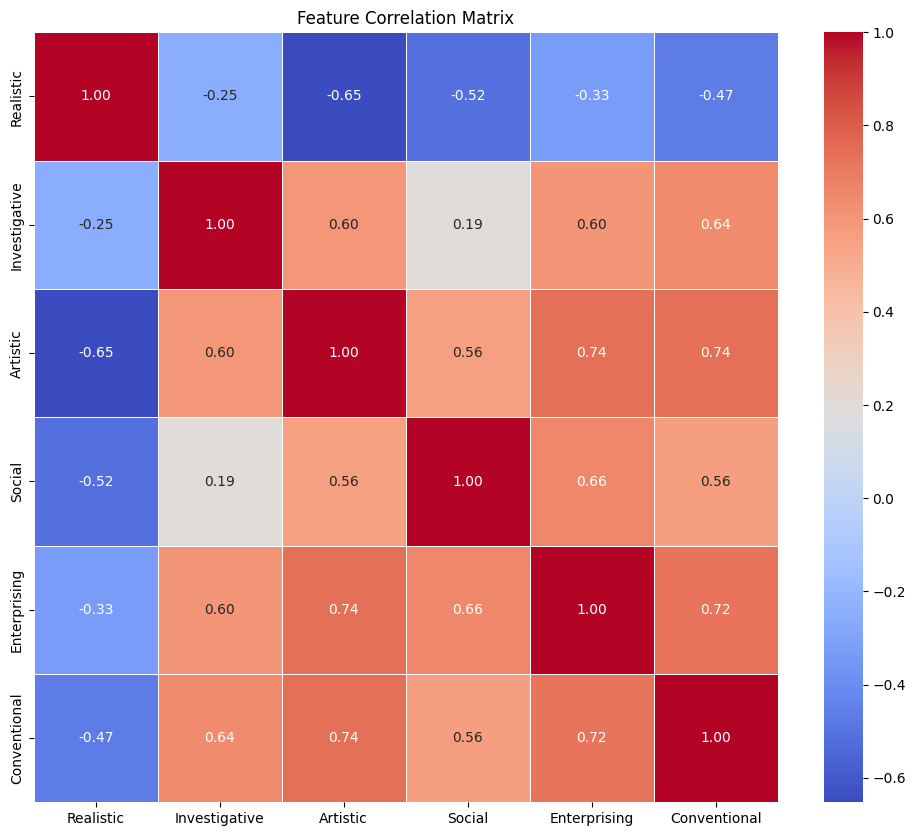


Model Accuracy: 0.60
Training set size: 696
Testing set size: 136

Feature Importances:
         Feature  Importance
0      Realistic    0.196399
3         Social    0.189346
5   Conventional    0.162044
1  Investigative    0.154639
2       Artistic    0.149055
4   Enterprising    0.148517

Model Top-5 Accuracy: 0.90
Sample 1:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.83)), (np.int64(11), np.float64(0.04333333333333334)), (np.int64(7), np.float64(0.03)), (np.int64(9), np.float64(0.03)), (np.int64(1), np.float64(0.02))]
Sample 2:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.6766666666666665)), (np.int64(16), np.float64(0.11)), (np.int64(15), np.float64(0.08)), (np.int64(14), np.float64(0.05)), (np.int64(1), np.float64(0.03333333333333333))]
Sample 3:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(7), np.float64(0.35)), (np.int64(0), np.float64(0.25)), (np.int64(1), np.float64(0.21)),

In [42]:
skills_6_2 = load_and_clean_skills_6_2_data()
train_random_forest_model(skills_6_2)

### RIASEC Mapping (Realistic,Investigative,Artistic,Social,Enterprising,Conventional)

Button(description='Submit', style=ButtonStyle())

Waiting for user input...



Top 5 predicted target labels for the new data:
1: Office and administrative support occupations (Probability: 0.1900)
2: Building and grounds cleaning and maintenance occupations (Probability: 0.1700)
3: Business and financial operations occupations (Probability: 0.1400)
4: Educational instruction and library occupations (Probability: 0.1200)
5: Food preparation and serving related occupations (Probability: 0.0700)

Most likely job title: Office and administrative support occupations


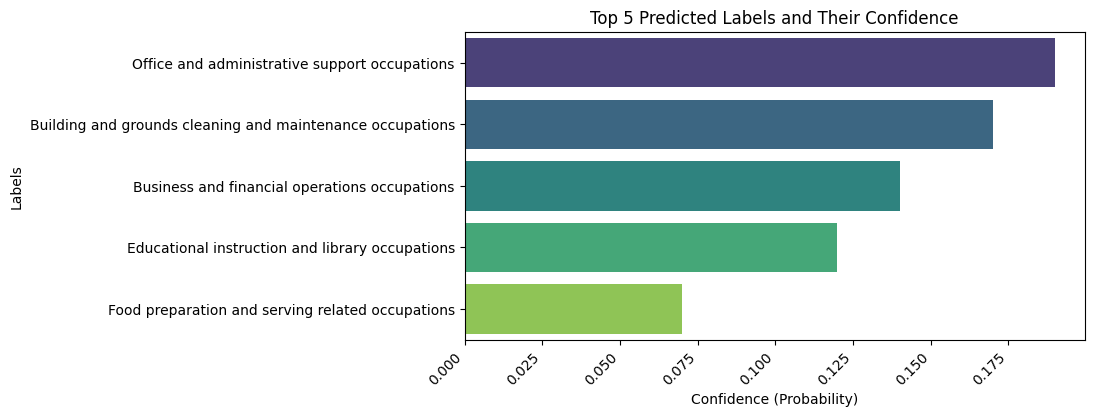

In [43]:
riasec_prediction_model(skills_6_1)

In [44]:
top_5_labels = get_top_5_predictions()
top_5_labels

['Office and administrative support occupations',
 'Building and grounds cleaning and maintenance occupations',
 'Business and financial operations occupations',
 'Educational instruction and library occupations',
 'Food preparation and serving related occupations']

### Top Job Groups by 2023 Annual Median Wage and Total Employment

In [45]:
# require the output from model to be used instead of this.
# top_5_labels_global = ['Office and administrative support occupations',
#        'Building and grounds cleaning and maintenance occupations',
#        'Business and financial operations occupations',
#        'Educational instruction and library occupations',
#        'Food preparation and serving related occupations']

In [46]:
pn.extension()
top_5_codes = get_top_5_matrix_codes(skills_6_1, top_5_labels)
result_widget_display_filter = skills_6_1['2023 National Employment Matrix code'].str.startswith(tuple(top_5_codes))
result_widget_name = skills_6_1[result_widget_display_filter]['2023 National Employment Matrix title'].str.strip().values
create_interactive_wage_plot(skills_6_1, result_widget_name)

BokehModel(combine_events=True, render_bundle={'docs_json': {'73ed2bde-fe6c-4db5-acee-99f9abd1ff61': {'version…

### Total Number of People by Education Level for Selected Occupation 

In [47]:
columns_selection = ['2023 National Employment Matrix title','2023 National Employment Matrix code']
skills_6_1_selected = skills_6_1[columns_selection]
skills_6_1_selected = skills_6_1_selected.drop(index=0).reset_index(drop=True)

skills_6_2 = load_and_clean_skills_6_2_data()
plot_education_distribution(skills_6_2, skills_6_1_selected)

BokehModel(combine_events=True, render_bundle={'docs_json': {'b94e16b0-0c90-4eb3-a0d3-2c51d0e47cb3': {'version…

### Top 10 Jobs by 2023 Annual Wage Data across Occupation groups selected

In [48]:
create_interactive_job_prefix_plot(skills_6_1, top_5_codes)

BokehModel(combine_events=True, render_bundle={'docs_json': {'e07bfeca-735c-4b37-894d-420ff477755c': {'version…

### Geoplot across Number of Employees

In [50]:
!python employeesAcrossSectors.py

Dash is running on http://127.0.0.1:8058/

 * Serving Flask app 'employeesAcrossSectors'
 * Debug mode: on
^C


### Top 3 Employment and wage change across industries

In [49]:
# to call from terminal go to folder containing app
# run python workTrends_2029.py

# !python workTrends_2029.py
!python workTrends_2029.py


/Users/keshavelango/Documents/GitHub/big-data-algo/labour-data-final/LabourData/notebooks/workTrends_2029.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/keshavelango/Documents/GitHub/big-data-algo/labour-data-final/LabourData/notebooks/workTrends_2029.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
Dash is running on http://127.0.0.1:8055/

 * Serving Flask app 'workTrends_2029'
 * Debug mode: on
^C
